In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Activation, SpatialDropout2D

In [ ]:
from keras.datasets import mnist

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
np.random.seed(50)
shuffle_indices = np.random.permutation(train_images.shape[0])
train_images = train_images[shuffle_indices]
train_labels = train_labels[shuffle_indices]


val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]




In [ ]:
val_images.shape[0]


10000

In [ ]:
train_images.shape[0]


50000

In [ ]:
test_images.shape[0]

10000

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import RMSprop, Adam
import cv2
import keras
from keras.models import Model
from keras.applications import VGG16
from skimage.transform import resize

In [ ]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

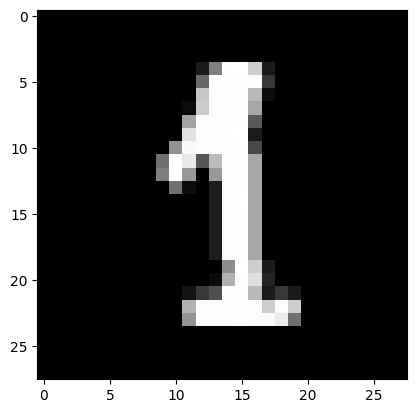

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

In [ ]:
# Reshape the input images to 3 channels
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
val_images = np.repeat(val_images[..., np.newaxis], 3, -1)

In [ ]:
# Resize the input images to 48x48 to fit VGG16 input size
train_images = np.array([resize(x, (48, 48, 3)) for x in train_images])
test_images = np.array([resize(x, (48, 48, 3)) for x in test_images])
val_images = np.array([resize(x, (48, 48, 3)) for x in val_images])

In [ ]:
# Normalize the pixel values
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:


model = Sequential([
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
           input_shape=(48, 48, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    SpatialDropout2D(0.2),

    Conv2D(filters=128, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=128, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    SpatialDropout2D(0.3),

    Conv2D(filters=256, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=256, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(filters=256, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    SpatialDropout2D(0.4),

    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0

In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    batch_size=1024, 
                    validation_data=(val_images, val_labels),
                    verbose=1)

Epoch 1/20
49/49 [==============================] - 87s 1s/step - loss: 0.5912 - accuracy: 0.8256 - val_loss: 3.9060 - val_accuracy: 0.1108
Epoch 2/20
49/49 [==============================] - 40s 807ms/step - loss: 0.1197 - accuracy: 0.9715 - val_loss: 5.1588 - val_accuracy: 0.1108
Epoch 3/20
49/49 [==============================] - 39s 795ms/step - loss: 0.0740 - accuracy: 0.9814 - val_loss: 5.9724 - val_accuracy: 0.1108
Epoch 4/20
15/49 [========>.....................] - ETA: 25s - loss: 0.0543 - accuracy: 0.9866

KeyboardInterrupt: ignored

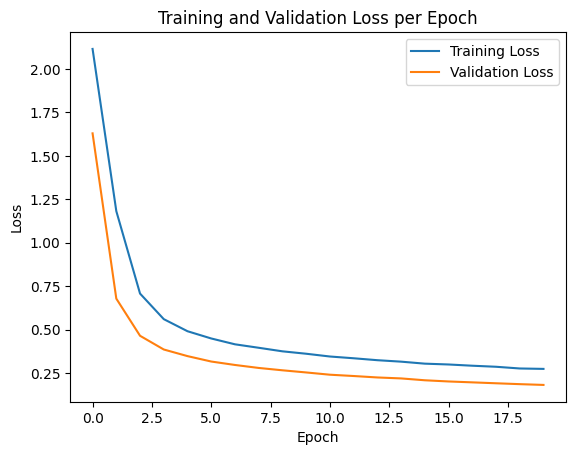

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

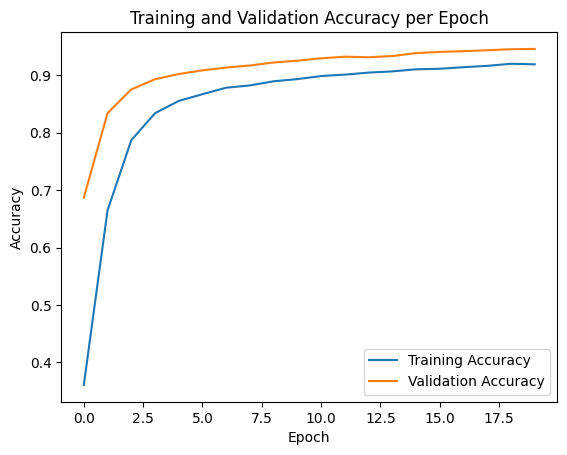

In [ ]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Load the pre-trained VGG16 model
vgg16 = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers in VGG16
for layer in vgg16.layers:
    layer.trainable = False

# Add a new classifier on top of the VGG16
# Define the VGG16 model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4333696   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
model.compile(optimizer=Adam(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    batch_size=1024, 
                    validation_data=(val_images, val_labels),
                    verbose=1)

Epoch 1/20
49/49 [==============================] - 6s 83ms/step - loss: 2.0678 - accuracy: 0.3699 - val_loss: 1.4864 - val_accuracy: 0.6535
Epoch 2/20
49/49 [==============================] - 3s 63ms/step - loss: 1.0825 - accuracy: 0.6828 - val_loss: 0.6322 - val_accuracy: 0.8438
Epoch 3/20
49/49 [==============================] - 3s 60ms/step - loss: 0.6669 - accuracy: 0.7978 - val_loss: 0.4408 - val_accuracy: 0.8818
Epoch 4/20
49/49 [==============================] - 3s 61ms/step - loss: 0.5324 - accuracy: 0.8408 - val_loss: 0.3656 - val_accuracy: 0.8947
Epoch 5/20
49/49 [==============================] - 3s 61ms/step - loss: 0.4688 - accuracy: 0.8610 - val_loss: 0.3267 - val_accuracy: 0.9066
Epoch 6/20
49/49 [==============================] - 3s 64ms/step - loss: 0.4225 - accuracy: 0.8763 - val_loss: 0.3014 - val_accuracy: 0.9114
Epoch 7/20
49/49 [==============================] - 3s 60ms/step - loss: 0.3927 - accuracy: 0.8858 - val_loss: 0.2767 - val_accuracy: 0.9195
Epoch 8/20
49

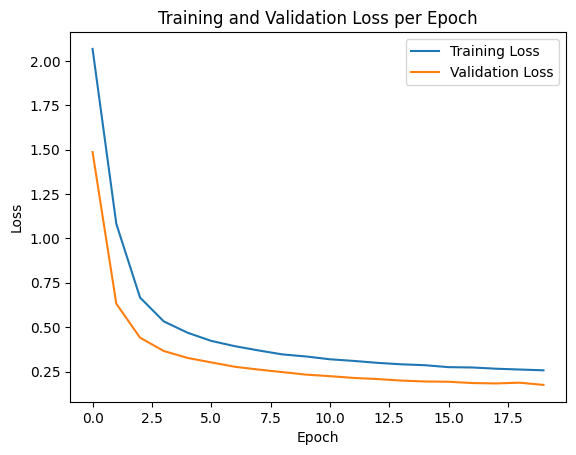

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

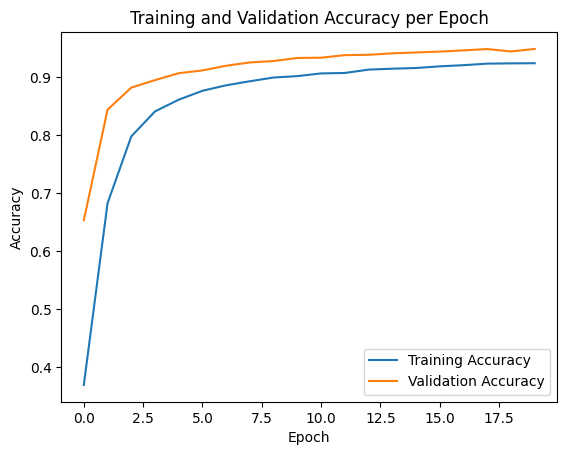

In [ ]:
# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()